# Cluster University

                                                                                                -Uday Kumar S

Students need to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
colleges = pd.read_csv("/Users/rogudays/Documents/Adverks-Data_Science/Assignement/cluster Universities/College.csv", index_col=0)
colleges.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Understanding the DataSet

In [3]:
colleges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [4]:
colleges.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### Figuring Out which College has the highest Applicants

In [5]:
colleges.loc[colleges['Apps']==np.max(colleges['Apps'])]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Rutgers at New Brunswick,No,48094,26330,4520,36,79,21401,3712,7410,4748,690,2009,90,95,19.5,19,10474,77


### Student Faculty ratio

In [6]:
colleges.loc[colleges['S.F.Ratio']==np.min(colleges['S.F.Ratio'])]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
University of Charleston,Yes,682,535,204,22,43,771,611,9500,3540,400,750,26,58,2.5,10,7683,57


### Highest Alumni Donation Rate

In [7]:
colleges.loc[colleges['perc.alumni']==np.max(colleges['perc.alumni'])]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Williams College,Yes,4186,1245,526,81,96,1988,29,19629,5790,500,1200,94,99,9.0,64,22014,99


### ratio of a school’s expenditure on each student to out-of-state tuition

In [8]:
colleges['expense ratio'] = colleges['Expend']/(colleges['Outstate'])
colleges.describe()['expense ratio']

count    777.000000
mean       0.958618
std        0.359789
min        0.378261
25%        0.741767
50%        0.862842
75%        1.072951
max        3.682883
Name: expense ratio, dtype: float64

### Best Expense Ratio

In [9]:
colleges.loc[colleges['expense ratio']==np.max(colleges['expense ratio'])]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,expense ratio
University of Alabama at Birmingham,No,1797,1260,938,24,35,6960,4698,4440,5175,750,2200,96,96,6.7,16,16352,33,3.682883


## Data Visualization

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

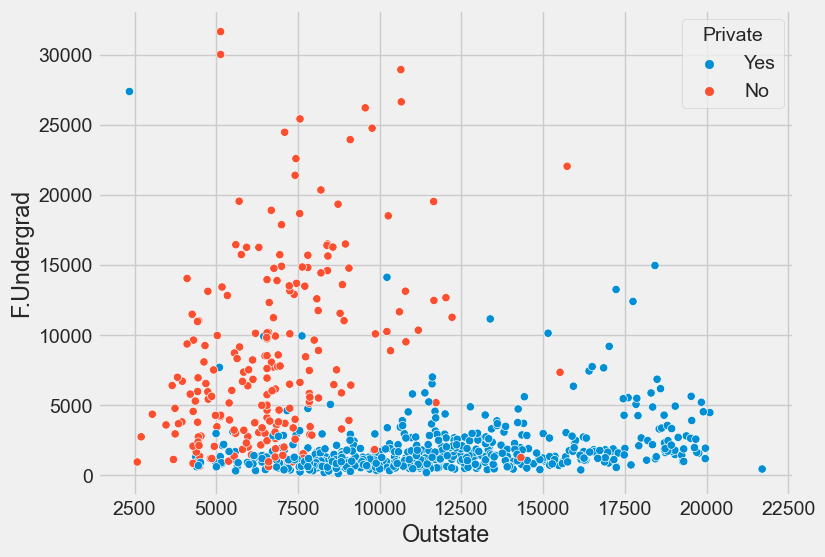

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=colleges,x='Outstate',y='F.Undergrad',hue='Private')

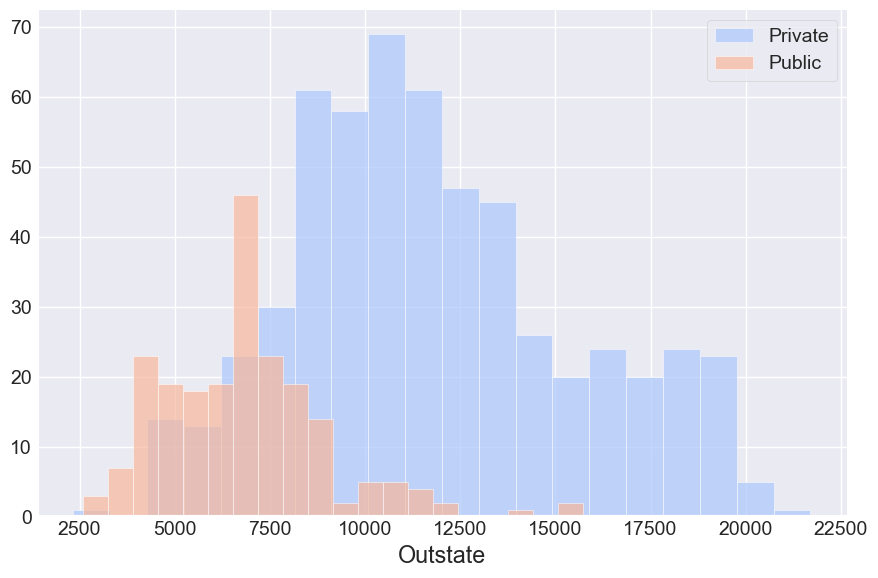

In [11]:
sns.set_style('darkgrid')
g = sns.FacetGrid(colleges,hue='Private',palette='coolwarm',height=6,aspect=1.5)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)
plt.legend(labels=['Private','Public'])

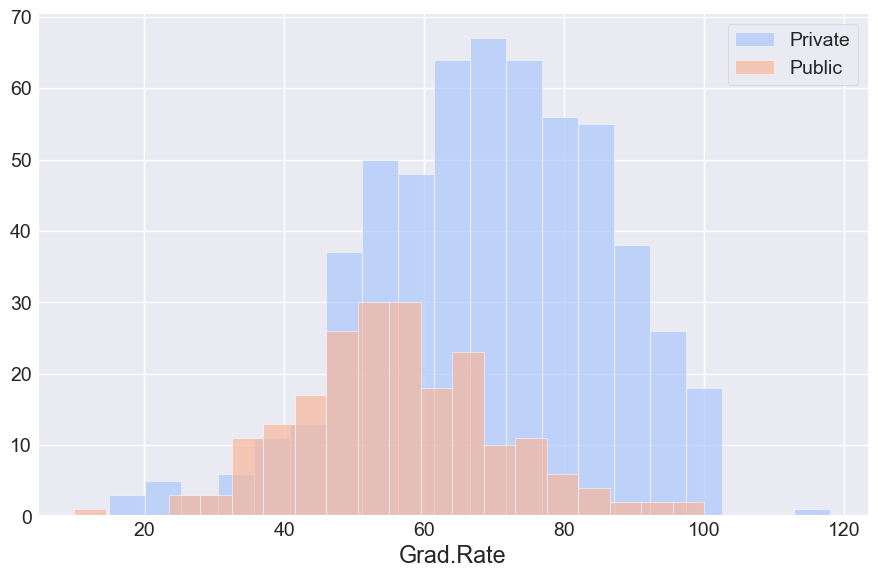

In [12]:
grid = sns.FacetGrid(colleges,hue='Private',palette='coolwarm',height=6,aspect=1.5)
grid = grid.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)
plt.legend(labels=['Private','Public'])

out-of-state tuition is higher for private schools, and so is graduation rate

## K-Means Cluster Creation

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(colleges.drop('Private',axis=1))

KMeans(n_clusters=2)

In [18]:
def convertToCluster(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
colleges['Cluster'] = colleges['Private'].apply(convertToCluster)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(colleges['Cluster'],km.labels_))
print(classification_report(colleges['Cluster'],km.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

